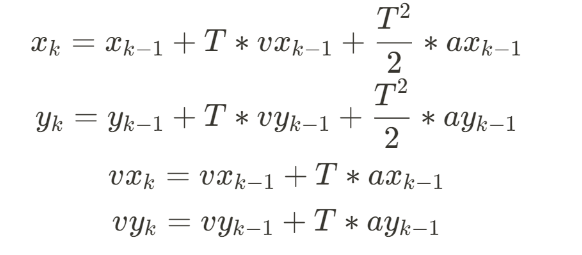

In [3]:
import numpy as np

class KalmanFilter():
    def __init__(self):
        self.time_step = 0.5
        self.acceleration_variance_x = 5
        self.acceleration_variance_y = 4

        self.A = np.array([
            [1, 0, self.time_step, 0],
            [0, 1, 0, self.time_step],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
        self.AT = self.A.T

        self.B = np.array([
            [self.time_step**2/2, 0],
            [0, self.time_step**2/2],
            [self.time_step, 0],
            [0, self.time_step]
        ])

        position_variance_x = (np.sqrt(self.acceleration_variance_x)*(self.time_step**2)/2)**2
        position_variance_y = (np.sqrt(self.acceleration_variance_y)*(self.time_step**2)/2)**2
        velocity_variance_x = (np.sqrt(self.acceleration_variance_x)*self.time_step)**2
        velocity_variance_y = (np.sqrt(self.acceleration_variance_y)*self.time_step)**2

        self.Q = np.array([
            [position_variance_x, 0, 0, 0],
            [0, position_variance_y, 0, 0],
            [0, 0, velocity_variance_x, 0],
            [0, 0, 0, velocity_variance_y]
        ])

        self.H = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0]
        ])
        self.HT = self.H.T

        self.measurement_noise_x = 2
        self.measurement_noise_y = 1

        self.R = np.array([
            [self.measurement_noise_x, 0],
            [0, self.measurement_noise_y]
        ])

        self.I = np.identity(4)

        self.x = np.zeros((4,1))
        self.u = np.array([[30], [20]])

        self.P = np.array([
            [5, 0, 0, 0],
            [0, 5, 0, 0],
            [0, 0, 10, 0],
            [0, 0, 0, 10]
        ])

    def predict(self):
        # Compute the state prediction
        self.x = np.dot(self.A,self.x) + np.dot(self.B,self.u)
        self.P = np.dot(self.A, np.dot(self.P, self.AT)) + self.Q
        return self.x

    def correct(self, z):
        # Compute the update step
        inverse =  np.linalg.inv(np.matmul(np.matmul(self.H,self.P, casting='unsafe'), self.HT) + self.R)
        K = np.matmul(np.matmul(self.P,self.HT), inverse)
        self.x = self.x + np.matmul(K,(z - np.matmul(self.H,self.x)))
        self.P = np.matmul((self.I - np.matmul(K,self.H)),self.P)
        return self.x, self.P

In [4]:
KF = KalmanFilter()
print('State Transition Matrix:\n', KF.A)
print('Control Matrix:\n', KF.B)
print('Control Vector:\n', KF.u)
print('Process Noise Covariance Matrix:\n', KF.Q)
print('Measurement Noise Covariance Matrix:\n', KF.R)
print('Measurement Matrix:\n', KF.H)

State Transition Matrix:
 [[1.  0.  0.5 0. ]
 [0.  1.  0.  0.5]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]
Control Matrix:
 [[0.125 0.   ]
 [0.    0.125]
 [0.5   0.   ]
 [0.    0.5  ]]
Control Vector:
 [[30]
 [20]]
Process Noise Covariance Matrix:
 [[0.078125 0.       0.       0.      ]
 [0.       0.0625   0.       0.      ]
 [0.       0.       1.25     0.      ]
 [0.       0.       0.       1.      ]]
Measurement Noise Covariance Matrix:
 [[2 0]
 [0 1]]
Measurement Matrix:
 [[1 0 0 0]
 [0 1 0 0]]


In [5]:
x_measure = [5, 2]
y_measure = [20, 12]

for i, (x_m, y_m) in enumerate(zip(x_measure, y_measure)):
  x = KF.predict()
  print('Predict iteration {}:'.format(i+1))
  print(x)
  x1, P = KF.correct(np.array([[x_m],
                            [y_m]]))
  print('Correct iteration {}:'.format(i+1))
  print(x1)
  print('P_{}:'.format(i+1))
  print(P)

Predict iteration 1:
[[ 3.75]
 [ 2.5 ]
 [15.  ]
 [10.  ]]
Correct iteration 1:
[[ 4.73898858]
 [17.95620438]
 [15.65252855]
 [20.2189781 ]]
P_1:
[[1.58238173 0.         1.04404568 0.        ]
 [0.         0.88321168 0.         0.58394161]
 [1.04404568 0.         8.63988581 0.        ]
 [0.         0.58394161 0.         8.08029197]]
Predict iteration 2:
[[16.31525285]
 [30.56569343]
 [30.65252855]
 [30.2189781 ]]
Correct iteration 2:
[[ 6.17079266]
 [16.08061767]
 [19.46648645]
 [11.34984458]]
P_2:
[[1.41729389 0.         1.56281446 0.        ]
 [0.         0.78020656 0.         1.01634413]
 [1.56281446 0.         5.69842634 0.        ]
 [0.         1.01634413 0.         4.38062769]]


In [7]:
import numpy as np
x = np.array([20, 25, 20, 10, 0, 0, 0, 0, 0, 0, 0, 0])
y = np.array([10, 30, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0])
print('Variance of error x:', np.std(x)**2)
print('Variance of error y:', np.std(y)**2)

Variance of error x: 88.02083333333334
Variance of error y: 75.00000000000001
